<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/04_01_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs

## Utility functions

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd

In [28]:
def adjmShow(M, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g

In [75]:
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [72]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
      else:
        L.append(list(map(int, line.strip().split())))
  return L, labels

## Adjacency Matrix

### Binary version

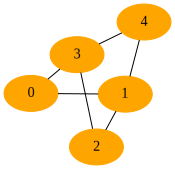

In [9]:
M1 = [[0, 1, 0, 1, 0],
      [1, 0, 1, 0, 1],
      [0, 1, 0, 1, 0],
      [1, 0, 1, 0, 1],
      [0, 1, 0, 1, 0]]

adjmShow(np.array(M1))

In [10]:
%%file 1.adjm
0 1 0 1 0
1 0 1 0 1
0 1 0 1 0
1 0 1 0 1
0 1 0 1 0

Writing 1.adjm


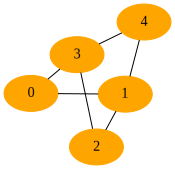

In [11]:
M2 = np.loadtxt("1.adjm", dtype=np.int)
adjmShow(M2)

### Weighted version

In [13]:
%%file 3.adjm
x 2 x -3 x
2 x 4 x 3
x 4 x 5 x
-3 x 5 x 1
x 3 x 1 x

Overwriting 2.adjm


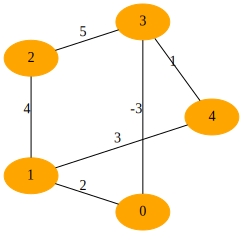

In [30]:
df = pd.read_csv("3.adjm", sep=" ", header=None).replace("x", np.nan)
M3 = df.to_numpy().astype(np.float)
adjmShow(M3, weighted=True, layout="circo")

In [31]:
print(M3)

[[nan  2. nan -3. nan]
 [ 2. nan  4. nan  3.]
 [nan  4. nan  5. nan]
 [-3. nan  5. nan  1.]
 [nan  3. nan  1. nan]]


# what about directed graphs?

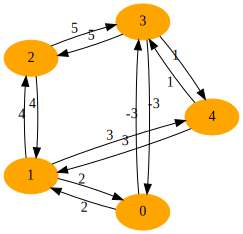

In [32]:
adjmShow(M3, directed=True, weighted=True, layout="circo")

In [33]:
%%file 4.adjm
x 2 x -3 x
x x x x x
x 4 x 5 x
x x x x x
x 3 x 1 x

Writing 4.adjm


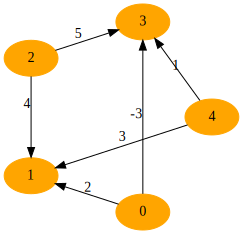

In [35]:
df = pd.read_csv("4.adjm", sep=" ", header=None).replace("x", np.nan)
M4 = df.to_numpy().astype(np.float)
adjmShow(M4, directed=True, weighted=True, layout="circo")

### How to process an adjacency Matrix

Binary version

In [37]:
n = len(M2)
print("Graph nodes:")
for u in range(n):
  print(f"Node {u}")

Graph nodes:
Node 0
Node 1
Node 2
Node 3
Node 4


In [38]:
for u in range(n):
  for v in range(n):
    if M2[u, v] == 1:
      print(f"Edge from node {u} to node {v}")

Edge from node 0 to node 1
Edge from node 0 to node 3
Edge from node 1 to node 0
Edge from node 1 to node 2
Edge from node 1 to node 4
Edge from node 2 to node 1
Edge from node 2 to node 3
Edge from node 3 to node 0
Edge from node 3 to node 2
Edge from node 3 to node 4
Edge from node 4 to node 1
Edge from node 4 to node 3


Weighted version

In [39]:
for u in range(n):
  for v in range(n):
    if not np.isnan(M4[u, v]):
      print(f"Edge from node {u} to node {v} with weight {M4[u, v]}")

Edge from node 0 to node 1 with weight 2.0
Edge from node 0 to node 3 with weight -3.0
Edge from node 2 to node 1 with weight 4.0
Edge from node 2 to node 3 with weight 5.0
Edge from node 4 to node 1 with weight 3.0
Edge from node 4 to node 3 with weight 1.0


## Adjacency Lists

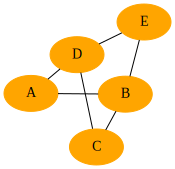

In [48]:
L1 = [[1, 3],
      [0, 2, 4],
      [1, 3],
      [0, 2, 4],
      [1, 3]]
adjlShow(L1, labels=["A", "B", "C", "D", "E"])

In [70]:
%%file 2.adjl
A B C D E
1 3
0 2 4
1 3
0 2 4
1 3

Writing 2.adjl


[1, 3]
[0, 2, 4]
[1, 3]
[0, 2, 4]
[1, 3]


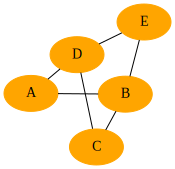

In [78]:
L2, labels = readAdjl("2.adjl", haslabels=True)
for l in L2:
  print(l)
adjlShow(L2, labels=labels)

#### Weighted

In [57]:
%%file 3.adjl
A B C D E
1|2 3|-3

1|4 3|5

1|3 3|1

Overwriting 3.adjl


[(1, 2), (3, -3)]
[]
[(1, 4), (3, 5)]
[]
[(1, 3), (3, 1)]


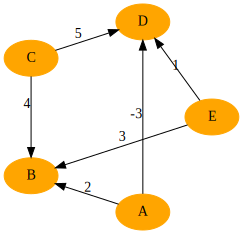

In [77]:
L3, labels = readAdjl("3.adjl", haslabels=True, weighted=True)
for l in L3:
  print(l)
adjlShow(L3, labels=labels, directed=True, weighted=True, layout="circo")

### Process adjacency list

In [79]:
n = len(L2)
for u in range(n):
  print(f"Node {u}")

Node 0
Node 1
Node 2
Node 3
Node 4


In [80]:
for u in range(n):
  for v in L2[u]:
    print(f"Edge from node {u} to node {v}")

Edge from node 0 to node 1
Edge from node 0 to node 3
Edge from node 1 to node 0
Edge from node 1 to node 2
Edge from node 1 to node 4
Edge from node 2 to node 1
Edge from node 2 to node 3
Edge from node 3 to node 0
Edge from node 3 to node 2
Edge from node 3 to node 4
Edge from node 4 to node 1
Edge from node 4 to node 3


Weighted Adjacency List

In [81]:
for u in range(n):
  for v, w in L3[u]:
    print(f"Edge from node {u} to node {v} with weight {w}")

Edge from node 0 to node 1 with weight 2
Edge from node 0 to node 3 with weight -3
Edge from node 2 to node 1 with weight 4
Edge from node 2 to node 3 with weight 5
Edge from node 4 to node 1 with weight 3
Edge from node 4 to node 3 with weight 1
